In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mehranehmgh","key":"c2c1365e6432393d8c5dfbe309c0236c"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data

  0% 0.00/2.44M [00:00<?, ?B/s]
100% 2.44M/2.44M [00:00<00:00, 79.8MB/s]


In [ ]:
!unzip '/content/new-york-city-airbnb-open-data.zip' -d '/content/'

Archive:  /content/new-york-city-airbnb-open-data.zip
  inflating: /content/AB_NYC_2019.csv  
  inflating: /content/New_York_City_.png  


In [ ]:
import seaborn as sns
import pandas as pd
import scipy
from scipy.stats import f_oneway
from scipy import stats
import matplotlib.pyplot as plt
import pylab

In [ ]:
!pip3 install  researchpy

In [ ]:
import researchpy

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


#**Number of Reviews Stats**

In [ ]:
df[["neighbourhood_group",'number_of_reviews']].groupby("neighbourhood_group").describe()

number_of_reviews                        ...                   
                                count       mean        std  ...   50%   75%    max
neighbourhood_group                                          ...                   
Bronx                          1091.0  26.004583  42.214774  ...   9.0  32.0  321.0
Brooklyn                      20104.0  24.202845  44.344868  ...   6.0  25.0  488.0
Manhattan                     21661.0  20.985596  42.572277  ...   4.0  19.0  607.0
Queens                         5666.0  27.700318  51.955853  ...   7.0  32.0  629.0
Staten Island                   373.0  30.941019  44.830766  ...  12.0  42.0  333.0

[5 rows x 8 columns]

In [ ]:
df[["neighbourhood_group",'neighbourhood']].groupby("neighbourhood_group").describe()

neighbourhood                           
                            count unique           top  freq
neighbourhood_group                                         
Bronx                        1091     48   Kingsbridge    70
Brooklyn                    20104     47  Williamsburg  3920
Manhattan                   21661     32        Harlem  2658
Queens                       5666     51       Astoria   900
Staten Island                 373     43    St. George    48

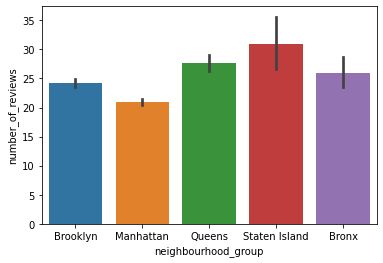

In [ ]:
sns.barplot(x="neighbourhood_group", y="number_of_reviews", data=df)

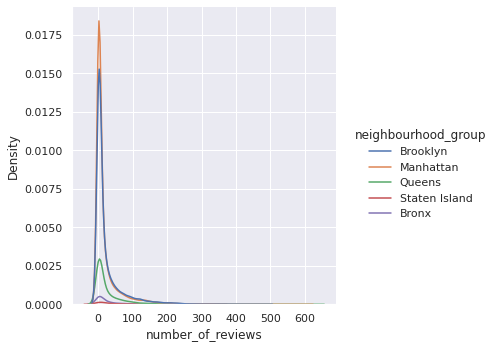

In [ ]:
sns.displot(df, x="number_of_reviews",hue="neighbourhood_group",kind="kde")

#**Hypothesis Testing and Results**

## **ANOVA**

In [ ]:
f_oneway(*[df.number_of_reviews[df.neighbourhood_group == i]
for i in df.neighbourhood_group.unique()])

F_onewayResult(statistic=34.335599870717246, pvalue=1.1485274809134217e-28)

In [ ]:
mask1 = df.neighbourhood_group == "Manhattan"
data1 = df[mask1]
manhattan = data1.sample(n=100)

mask2 = df.neighbourhood_group == "Brooklyn"
data2 = df[mask2]
brooklyn = data2.sample(n=100)

mask3 = df.neighbourhood_group == "Staten Island"
data3 = df[mask3]
staten = data3.sample(n=100)

mask4 = df.neighbourhood_group == "Queens"
data4 = df[mask4]
queens = data4.sample(n=100)

mask5 = df.neighbourhood_group == "Bronx"
data5 = df[mask5]
bronx = data5.sample(n=100)

new_samp = pd.concat([manhattan, brooklyn, staten, queens, bronx])

f_oneway(*[new_samp.number_of_reviews[new_samp.neighbourhood_group == s]
for s in new_samp.neighbourhood_group.unique()])

F_onewayResult(statistic=2.933780771825835, pvalue=0.020399090082600036)

In [ ]:
new_samp

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
16107,13016389,DAZZLING APT SKYLINE VIEW IN PRIME LOCATION,71838636,Michael,Manhattan,Chelsea,40.73596,-73.99228,Entire home/apt,300,5,22,2019-06-18,0.58,1,87
24659,19812026,"Lovely, Cozy Room in Inwood",38098992,Julia,Manhattan,Inwood,40.86437,-73.92347,Private room,65,2,2,2018-07-01,0.10,2,76
8727,6702693,"Designer Fifth Ave 4BR 5Ba 6,000sf Modern Loft",8730,Allison,Manhattan,Chelsea,40.73692,-73.99219,Entire home/apt,1495,1,11,2016-11-16,0.22,1,0
26086,20809807,A CLASSIC NYC NEIGHBORHOOD-EAST 86TH/5TH AVENUE,76104209,Rated,Manhattan,Upper East Side,40.77981,-73.96031,Entire home/apt,220,30,0,NaN,NaN,33,334
24761,19880329,Charming Townhouse duplex in Chelsea,6861839,Eli,Manhattan,Chelsea,40.74637,-74.00263,Entire home/apt,500,3,1,2017-12-29,0.05,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41699,32422767,Big and beautiful room in big and beautiful Ap.,133030103,Amaury,Bronx,Wakefield,40.89308,-73.85076,Private room,41,7,2,2019-05-10,0.58,1,357
8521,6557289,1 Room in a 2 Bedroom Available,7074531,Jonathan,Bronx,Longwood,40.82639,-73.90363,Private room,680,1,0,NaN,NaN,1,0
46778,35428298,NYC Diamond New 5 star 2nd floor Loft 5beds 2b...,266627618,Charlene,Bronx,Wakefield,40.90260,-73.84806,Entire home/apt,288,2,0,NaN,NaN,1,346
48416,36243183,Spacious private room #2,35783912,Pi & Leo,Bronx,Fordham,40.86264,-73.89139,Private room,29,2,0,NaN,NaN,8,81


In [ ]:
new_samp[["neighbourhood_group",'number_of_reviews']].groupby("neighbourhood_group").describe()

number_of_reviews                    ...                    
                                count   mean        std  ...   50%    75%    max
neighbourhood_group                                      ...                    
Bronx                           100.0  23.62  41.294160  ...  10.0  25.25  271.0
Brooklyn                        100.0  28.78  56.574717  ...   7.5  33.25  357.0
Manhattan                       100.0  14.82  30.571123  ...   3.0  12.00  172.0
Queens                          100.0  22.52  38.047148  ...   5.0  25.75  239.0
Staten Island                   100.0  34.56  44.375878  ...  17.5  48.75  193.0

[5 rows x 8 columns]

## **T-Test**

In [ ]:
mask = df.neighbourhood_group == "Staten Island"
val1 = df[mask]["number_of_reviews"].sample(n=100).values
len(val1)

100

In [ ]:
val2 = df["number_of_reviews"].sample(n=100).values

In [ ]:
stats.ttest_rel(val1,val2)

Ttest_relResult(statistic=2.959987970112318, pvalue=0.003849890194805916)

In [ ]:
stats.wilcoxon(val1,val2)

WilcoxonResult(statistic=1324.5, pvalue=0.00038928875443851595)

In [ ]:
df1 = df[mask]["number_of_reviews"].sample(n=100)
df2 = df["number_of_reviews"].sample(n=100)

In [ ]:
researchpy.ttest(df1,df2)

(            Variable      N    Mean         SD        SE  95% Conf.   Interval
 0  number_of_reviews  100.0  27.560  39.254755  3.925475  19.771005  35.348995
 1  number_of_reviews  100.0  21.730  38.150911  3.815091  14.160032  29.299968
 2           combined  200.0  24.645  38.719828  2.737905  19.245970  30.044030,
                                   Independent t-test   results
 0  Difference (number_of_reviews - number_of_revi...    5.8300
 1                              Degrees of freedom =   198.0000
 2                                               t =     1.0650
 3                           Two side test p value =     0.2882
 4                          Difference < 0 p value =     0.8559
 5                          Difference > 0 p value =     0.1441
 6                                       Cohen's d =     0.1506
 7                                       Hedge's g =     0.1500
 8                                   Glass's delta =     0.1485
 9                                     

In [ ]:
mask1 = df.neighbourhood_group == "Brooklyn"
mask2= df.neighbourhood_group == "Staten Island"
val1 = df[mask1]["number_of_reviews"].sample(n=70).values
val2 = df[mask2]["number_of_reviews"].sample(n=70).values

In [ ]:
stats.ttest_rel(val1,val2)

Ttest_relResult(statistic=-2.0564902975239665, pvalue=0.043519127356042034)

In [ ]:
stats.wilcoxon(val1,val2)

WilcoxonResult(statistic=797.5, pvalue=0.03286112127191071)

# **Room Type** & **PRICE**

In [ ]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
df[["room_type",'price']].groupby("room_type").describe()

price                          ...                       
                   count        mean         std  ...    50%    75%      max
room_type                                         ...                       
Entire home/apt  25409.0  211.794246  284.041611  ...  160.0  229.0  10000.0
Private room     22326.0   89.780973  160.205262  ...   70.0   95.0  10000.0
Shared room       1160.0   70.127586  101.725252  ...   45.0   75.0   1800.0

[3 rows x 8 columns]

## **ANOVA**

In [ ]:
mask1 = df.room_type == "Entire home/apt"
data1 = df[mask1]
entire = data1.sample(n=100)

mask2 = df.room_type == "Private room"
data2 = df[mask2]
private = data2.sample(n=100)

mask3 = df.room_type == "Shared room"
data3 = df[mask3]
shared = data3.sample(n=100)

samp = pd.concat([entire, private, shared])

f_oneway(*[samp.price[samp.room_type == s]
for s in samp.room_type.unique()])

F_onewayResult(statistic=51.405315608529115, pvalue=6.744713642638779e-20)

## **T-Test**

In [ ]:
mask = df.room_type == "Entire home/apt"
mask1 = df.room_type == "Private room"
df1 = df[mask]["price"].sample(n=100)
df2 = df[mask1]["price"].sample(n=100)

In [ ]:
researchpy.ttest(df1,df2)

(   Variable      N     Mean          SD         SE   95% Conf.    Interval
 0     price  100.0  212.560  182.072486  18.207249  176.432869  248.687131
 1     price  100.0   84.370   55.259106   5.525911   73.405395   95.334605
 2  combined  200.0  148.465  148.794583  10.521366  127.717324  169.212676,
               Independent t-test   results
 0  Difference (price - price) =   128.1900
 1          Degrees of freedom =   198.0000
 2                           t =     6.7371
 3       Two side test p value =     0.0000
 4      Difference < 0 p value =     1.0000
 5      Difference > 0 p value =     0.0000
 6                   Cohen's d =     0.9528
 7                   Hedge's g =     0.9492
 8               Glass's delta =     0.7041
 9                 Pearson's r =     0.4318)

# **Minimum nights & Price**

In [ ]:
df.minimum_nights.isnull().sum()

0

## **Correlation tests**

In [ ]:
stats.spearmanr(df['minimum_nights'], df['price'])

SpearmanrResult(correlation=0.10128900445001728, pvalue=1.1582087858911544e-111)

In [ ]:
cor, pval = stats.pearsonr(df['minimum_nights'], df['price'])
print(cor, pval)

0.04279933414330346 2.8531707312205514e-21


In [ ]:
sample_1 = df.sample(n=200)

In [ ]:
stats.spearmanr(sample_1['minimum_nights'], sample_1['price'])

SpearmanrResult(correlation=0.0877410638694252, pvalue=0.21666215438849593)

In [ ]:
cor, pval = stats.pearsonr(sample_1['minimum_nights'], sample_1['price'])
print(cor, pval)

0.0745116512143513 0.2943588833585712


# **Availibility & Busy**

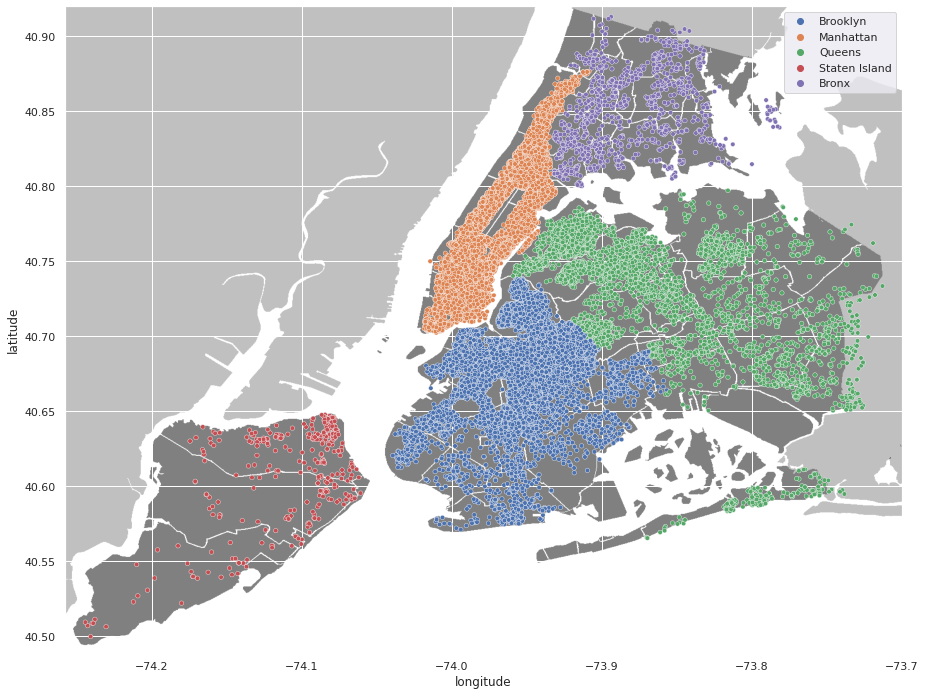

In [ ]:
import matplotlib.pyplot as plt
import urllib
plt.figure(figsize=(15,15))
nyc_img=plt.imread(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'))
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue='neighbourhood_group',s=20, data=df)
plt.legend()
plt.show()

In [ ]:
df['busy_or_not']= 0
df

##if busy(availibility=0)=1 if not = 0

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,busy_or_not
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,0
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,0
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,0
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,0


In [ ]:
for i in range(len(df)):
    if int(df.iloc[i, df.columns.get_loc('availability_365')]) == 0:
        df.iloc[i, df.columns.get_loc('busy_or_not')] = 1

In [ ]:
df[["neighbourhood_group",'busy_or_not']].groupby("neighbourhood_group").describe()

busy_or_not                                             
                          count      mean       std  min  25%  50%  75%  max
neighbourhood_group                                                         
Bronx                    1091.0  0.162236  0.368837  0.0  0.0  0.0  0.0  1.0
Brooklyn                20104.0  0.390171  0.487801  0.0  0.0  0.0  1.0  1.0
Manhattan               21661.0  0.374036  0.483884  0.0  0.0  0.0  1.0  1.0
Queens                   5666.0  0.241440  0.427994  0.0  0.0  0.0  0.0  1.0
Staten Island             373.0  0.112601  0.316528  0.0  0.0  0.0  0.0  1.0

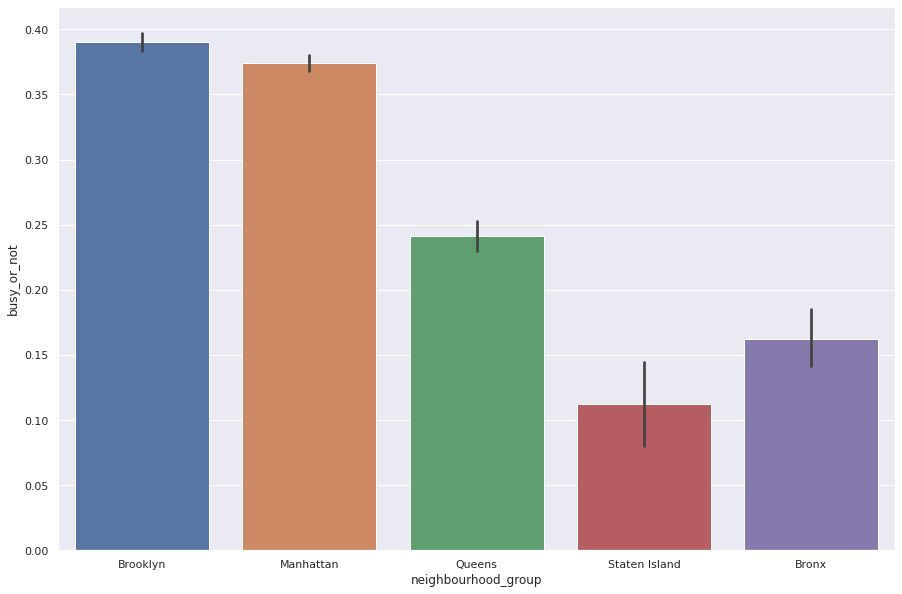

In [ ]:
ax = sns.barplot(x="neighbourhood_group", y="busy_or_not", data=df)

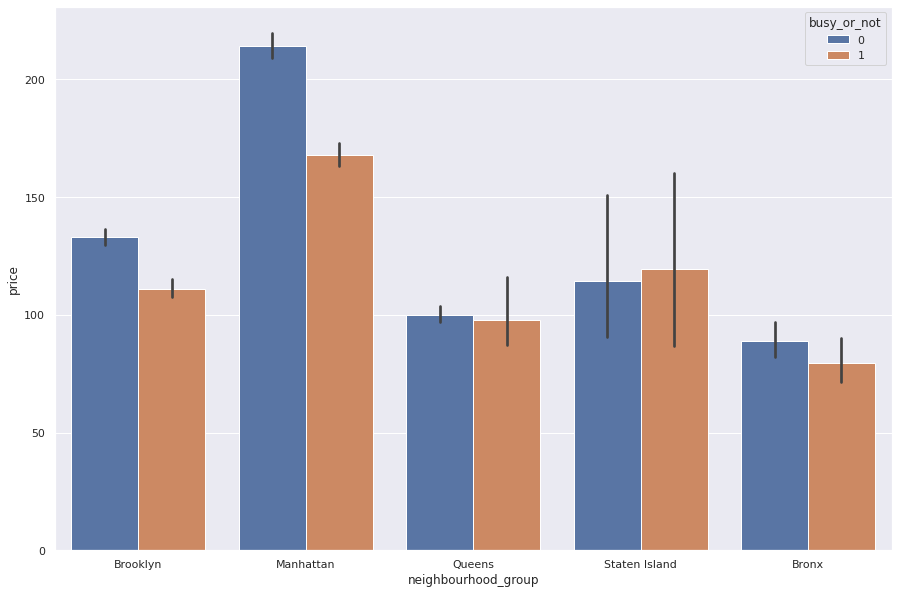

In [ ]:
sns.barplot(x="neighbourhood_group", y="price", hue="busy_or_not", data=df)

In [ ]:
mask1 = df.busy_or_not == 1

In [ ]:
df1 = df[mask]["price"].sample(n=50)
df2 = df["price"].sample(n=50)

In [ ]:
researchpy.ttest(df1,df2)

(   Variable      N    Mean          SD         SE   95% Conf.    Interval
 0     price   50.0  249.16  264.882982  37.460111  173.881089  324.438911
 1     price   50.0  110.40   73.749991  10.429824   89.440484  131.359516
 2  combined  100.0  179.78  205.624429  20.562443  138.979652  220.580348,
               Independent t-test   results
 0  Difference (price - price) =   138.7600
 1          Degrees of freedom =    98.0000
 2                           t =     3.5685
 3       Two side test p value =     0.0006
 4      Difference < 0 p value =     0.9997
 5      Difference > 0 p value =     0.0003
 6                   Cohen's d =     0.7137
 7                   Hedge's g =     0.7082
 8               Glass's delta =     0.5239
 9                 Pearson's r =     0.3391)

In [ ]:
v1 = df[mask]["number_of_reviews"].sample(n=50).values
v2 = df["number_of_reviews"].sample(n=50).values

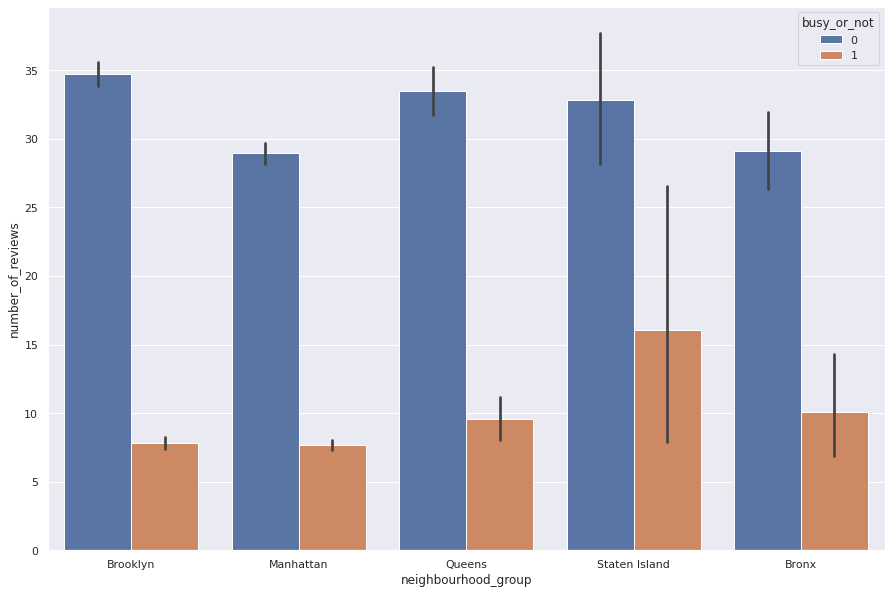

In [ ]:
sns.barplot(x="neighbourhood_group", y="number_of_reviews", hue="busy_or_not", data=df)

In [ ]:
stats.ttest_rel(val1,val2)

Ttest_relResult(statistic=-2.0564902975239665, pvalue=0.043519127356042034)

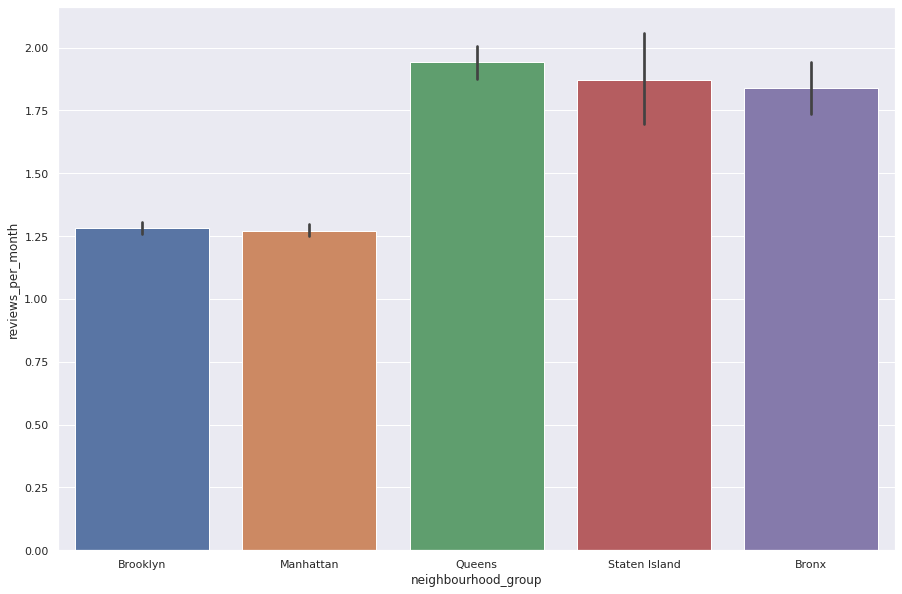

In [ ]:
sns.barplot(x="neighbourhood_group", y="reviews_per_month",data=df)

In [ ]:
df[["neighbourhood_group",'availability_365']].groupby("neighbourhood_group").describe()

availability_365              ...              
                               count        mean  ...    75%    max
neighbourhood_group                               ...              
Bronx                         1091.0  165.758937  ...  313.5  365.0
Brooklyn                     20104.0  100.232292  ...  188.0  365.0
Manhattan                    21661.0  111.979410  ...  230.0  365.0
Queens                        5666.0  144.451818  ...  286.0  365.0
Staten Island                  373.0  199.678284  ...  333.0  365.0

[5 rows x 8 columns]

In [ ]:
df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [ ]:
man = df.neighbourhood_group == "Manhattan"
brook = df.neighbourhood_group == "Brooklyn"
staten = df.neighbourhood_group == "Staten Island"
queens = df.neighbourhood_group == "Queens"
bronx = df.neighbourhood_group == "Bronx"

In [ ]:
df[man][["neighbourhood",'availability_365']].groupby("neighbourhood").describe()

availability_365              ...               
                               count        mean  ...     75%    max
neighbourhood                                     ...               
Battery Park City               70.0  100.328571  ...  212.50  365.0
Chelsea                       1113.0  113.995508  ...  245.00  365.0
Chinatown                      368.0   90.796196  ...  172.75  365.0
Civic Center                    52.0   68.269231  ...   89.00  365.0
East Harlem                   1117.0   98.973142  ...  180.00  365.0
East Village                  1853.0   74.623853  ...  123.00  365.0
Financial District             744.0  191.536290  ...  331.25  365.0
Flatiron District               80.0  123.050000  ...  287.00  365.0
Gramercy                       338.0   94.526627  ...  182.00  365.0
Greenwich Village              392.0   82.051020  ...  157.00  365.0
Harlem                        2658.0  106.577502  ...  202.75  365.0
Hell's Kitchen                1958.0  138.846782  ...  270.00  365.0
Inwood                         252.0   98.547619  ...  179.25  365.0
Kips Bay                       470.0  121.717021  ...  265.75  365.0
Little Italy                   121.0  100.338843  ...  179.00  362.0
Lower East Side                911.0   97.165752  ...  188.00  365.0
Marble Hill                     12.0  114.666667  ...  255.50  349.0
Midtown                       1545.0  157.703560  ...  311.00  365.0
Morningside Heights            346.0   43.054913  ...   26.50  365.0
Murray Hill                    485.0  173.321649  ...  335.00  365.0
NoHo                            78.0  101.820513  ...  179.00  364.0
Nolita                         253.0   69.810277  ...  110.00  365.0
Roosevelt Island                77.0   72.584416  ...   88.00  362.0
SoHo                           358.0  110.357542  ...  206.00  365.0
Stuyvesant Town                 37.0   65.108108  ...   90.00  365.0
Theater District               288.0  201.871528  ...  333.00  365.0
Tribeca                        177.0  126.508475  ...  280.00  365.0
Two Bridges                     72.0   86.236111  ...  149.25  359.0
Upper East Side               1798.0  112.798109  ...  241.75  365.0
Upper West Side               1971.0   96.583460  ...  197.00  365.0
Washington Heights             899.0   98.932147  ...  181.50  365.0
West Village                   768.0   85.459635  ...  157.25  365.0

[32 rows x 8 columns]

In [ ]:
df[brook][["neighbourhood",'availability_365']].groupby("neighbourhood").describe()

availability_365              ...               
                                     count        mean  ...     75%    max
neighbourhood                                           ...               
Bath Beach                            17.0  196.117647  ...  324.00  364.0
Bay Ridge                            141.0  142.929078  ...  276.00  365.0
Bedford-Stuyvesant                  3714.0  116.634626  ...  237.00  365.0
Bensonhurst                           75.0  134.840000  ...  236.00  365.0
Bergen Beach                          10.0  138.200000  ...  160.00  322.0
Boerum Hill                          177.0   77.271186  ...  125.00  365.0
Borough Park                         136.0  168.323529  ...  333.00  365.0
Brighton Beach                        75.0  170.866667  ...  303.00  365.0
Brooklyn Heights                     154.0   66.038961  ...   94.00  365.0
Brownsville                           61.0  121.327869  ...  223.00  365.0
Bushwick                            2465.0   95.550913  ...  177.00  365.0
Canarsie                             147.0  223.870748  ...  349.00  365.0
Carroll Gardens                      233.0   71.669528  ...  138.00  365.0
Clinton Hill                         572.0   95.013986  ...  179.00  365.0
Cobble Hill                           99.0   63.212121  ...  103.00  345.0
Columbia St                           42.0   69.095238  ...   93.50  356.0
Coney Island                          17.0  163.235294  ...  221.00  364.0
Crown Heights                       1564.0   96.020460  ...  179.00  365.0
Cypress Hills                        135.0  168.496296  ...  304.50  365.0
DUMBO                                 36.0  114.472222  ...  236.75  365.0
Downtown Brooklyn                     83.0   39.481928  ...   33.00  365.0
Dyker Heights                         12.0  144.750000  ...  285.50  308.0
East Flatbush                        500.0  180.944000  ...  322.00  365.0
East New York                        218.0  186.536697  ...  300.75  365.0
Flatbush                             621.0   94.484702  ...  176.00  365.0
Flatlands                             83.0  197.240964  ...  340.50  365.0
Fort Greene                          489.0   90.149284  ...  173.00  365.0
Fort Hamilton                         55.0  151.000000  ...  294.50  365.0
Gowanus                              247.0  122.716599  ...  270.00  365.0
Gravesend                             68.0  130.191176  ...  250.00  365.0
Greenpoint                          1115.0   79.077130  ...  122.00  365.0
Kensington                           175.0   83.948571  ...  140.50  365.0
Manhattan Beach                        8.0  205.625000  ...  315.75  363.0
Midwood                              109.0   97.816514  ...  173.00  365.0
Mill Basin                             4.0  290.000000  ...  344.25  360.0
Navy Yard                             14.0   48.928571  ...   31.25  365.0
Park Slope                           506.0   88.786561  ...  183.75  365.0
Prospect Heights                     357.0   77.515406  ...  146.00  365.0
Prospect-Lefferts Gardens            535.0   95.110280  ...  179.00  365.0
Red Hook                              79.0   96.202532  ...  183.50  351.0
Sea Gate                               7.0   65.571429  ...   99.50  260.0
Sheepshead Bay                       164.0  160.536585  ...  323.50  365.0
South Slope                          284.0   83.760563  ...  164.00  365.0
Sunset Park                          390.0  106.641026  ...  183.75  365.0
Vinegar Hill                          34.0   79.529412  ...  139.50  365.0
Williamsburg                        3920.0   74.722704  ...  115.00  365.0
Windsor Terrace                      157.0   81.885350  ...  168.00  353.0

[47 rows x 8 columns]

In [ ]:
df[staten][["neighbourhood",'availability_365']].groupby("neighbourhood").describe()

availability_365              ...               
                                      count        mean  ...     75%    max
neighbourhood                                            ...               
Arden Heights                           4.0   94.250000  ...  120.25  316.0
Arrochar                               21.0  255.809524  ...  338.00  362.0
Bay Terrace, Staten Island              2.0    0.000000  ...    0.00    0.0
Bull's Head                             6.0  165.666667  ...  316.25  364.0
Castleton Corners                       4.0  188.750000  ...  353.75  365.0
Clifton                                15.0  189.400000  ...  311.00  361.0
Concord                                26.0  255.576923  ...  340.75  362.0
Dongan Hills                            7.0  157.285714  ...  269.50  342.0
Eltingville                             3.0  193.000000  ...  274.50  291.0
Emerson Hill                            5.0   80.800000  ...  144.00  158.0
Fort Wadsworth                          1.0  365.000000  ...  365.00  365.0
Graniteville                            3.0  163.000000  ...  244.50  263.0
Grant City                              6.0  240.333333  ...  308.75  333.0
Great Kills                            10.0  148.600000  ...  186.25  336.0
Grymes Hill                             7.0  141.571429  ...  256.50  350.0
Howland Hook                            2.0  225.500000  ...  294.25  363.0
Huguenot                                3.0  208.000000  ...  244.00  259.0
Lighthouse Hill                         2.0  215.500000  ...  287.75  360.0
Mariners Harbor                         8.0  191.500000  ...  248.75  365.0
Midland Beach                           6.0  236.000000  ...  341.00  358.0
New Brighton                            5.0  142.600000  ...  241.00  276.0
New Dorp                                1.0    0.000000  ...    0.00    0.0
New Dorp Beach                          5.0  174.400000  ...  307.00  341.0
New Springville                         8.0   65.250000  ...   88.25  175.0
Oakwood                                 5.0  188.400000  ...  363.00  364.0
Port Richmond                           9.0  191.000000  ...  363.00  365.0
Prince's Bay                            4.0  110.500000  ...  137.75  353.0
Randall Manor                          19.0  275.210526  ...  354.50  362.0
Richmondtown                            1.0  300.000000  ...  300.00  300.0
Rosebank                                7.0  175.142857  ...  245.50  291.0
Rossville                               1.0   59.000000  ...   59.00   59.0
Shore Acres                             7.0  114.571429  ...  174.00  278.0
Silver Lake                             2.0  162.000000  ...  243.00  324.0
South Beach                             8.0  182.875000  ...  311.75  363.0
St. George                             48.0  191.750000  ...  336.00  365.0
Stapleton                              27.0  215.629630  ...  352.00  365.0
Todt Hill                               4.0   89.000000  ...  106.00  268.0
Tompkinsville                          42.0  209.428571  ...  314.00  360.0
Tottenville                             7.0  267.571429  ...  338.50  365.0
West Brighton                          18.0  274.722222  ...  352.50  365.0
Westerleigh                             2.0  112.500000  ...  150.75  189.0
Willowbrook                             1.0  351.000000  ...  351.00  351.0
Woodrow                                 1.0    0.000000  ...    0.00    0.0

[43 rows x 8 columns]

In [ ]:
df[queens][["neighbourhood",'availability_365']].groupby("neighbourhood").describe()

availability_365              ...               
                               count        mean  ...     75%    max
neighbourhood                                     ...               
Arverne                         77.0  188.428571  ...  332.00  364.0
Astoria                        900.0  109.191111  ...  217.75  365.0
Bay Terrace                      6.0  222.500000  ...  328.50  362.0
Bayside                         39.0  189.923077  ...  322.00  365.0
Bayswater                       17.0  207.352941  ...  309.00  342.0
Belle Harbor                     8.0  186.625000  ...  326.75  364.0
Bellerose                       14.0  242.857143  ...  357.50  365.0
Breezy Point                     3.0  100.333333  ...  121.00  160.0
Briarwood                       56.0  177.928571  ...  320.75  365.0
Cambria Heights                 26.0  144.115385  ...  242.00  365.0
College Point                   19.0  141.631579  ...  294.50  361.0
Corona                          64.0  244.171875  ...  352.50  365.0
Ditmars Steinway               309.0  117.737864  ...  243.00  365.0
Douglaston                       8.0  205.625000  ...  248.25  325.0
East Elmhurst                  185.0  169.491892  ...  318.00  365.0
Edgemere                        11.0  275.272727  ...  357.50  363.0
Elmhurst                       237.0  128.396624  ...  246.00  365.0
Far Rockaway                    29.0  165.862069  ...  312.00  365.0
Flushing                       426.0  166.251174  ...  320.00  365.0
Forest Hills                   144.0  127.736111  ...  235.25  365.0
Fresh Meadows                   32.0  137.968750  ...  315.50  365.0
Glendale                        54.0  147.277778  ...  272.25  365.0
Hollis                          14.0  145.785714  ...  176.00  365.0
Holliswood                       4.0  169.500000  ...  225.75  363.0
Howard Beach                    20.0  208.500000  ...  333.25  365.0
Jackson Heights                186.0  150.279570  ...  296.75  365.0
Jamaica                        231.0  188.506494  ...  331.50  365.0
Jamaica Estates                 19.0  171.315789  ...  281.50  359.0
Jamaica Hills                    8.0  140.125000  ...  204.25  318.0
Kew Gardens                     32.0  201.156250  ...  342.75  365.0
Kew Gardens Hills               26.0  124.615385  ...  178.00  364.0
Laurelton                       18.0  184.611111  ...  308.25  361.0
Little Neck                      5.0   81.200000  ...   94.00  133.0
Long Island City               537.0  118.256983  ...  255.00  365.0
Maspeth                        110.0  187.509091  ...  302.25  365.0
Middle Village                  31.0  211.000000  ...  310.00  365.0
Neponsit                         3.0  231.000000  ...  324.50  334.0
Ozone Park                      62.0  153.838710  ...  283.50  364.0
Queens Village                  60.0  166.433333  ...  332.75  365.0
Rego Park                      106.0  133.566038  ...  276.00  365.0
Richmond Hill                   94.0  194.936170  ...  340.75  365.0
Ridgewood                      423.0  114.425532  ...  216.00  365.0
Rockaway Beach                  56.0  162.428571  ...  254.25  365.0
Rosedale                        59.0  177.949153  ...  305.50  365.0
South Ozone Park                40.0  226.100000  ...  356.75  365.0
Springfield Gardens             85.0  204.011765  ...  342.00  365.0
St. Albans                      76.0  225.973684  ...  358.00  365.0
Sunnyside                      363.0  125.707989  ...  250.50  365.0
Whitestone                      11.0  177.272727  ...  296.00  365.0
Woodhaven                       88.0  200.920455  ...  330.50  365.0
Woodside                       235.0  130.217021  ...  247.00  365.0

[51 rows x 8 columns]

In [ ]:
df[bronx][["neighbourhood",'availability_365']].groupby("neighbourhood").describe()

availability_365              ...               
                              count        mean  ...     75%    max
neighbourhood                                    ...               
Allerton                       42.0  163.666667  ...  249.25  364.0
Baychester                      7.0  157.857143  ...  227.50  356.0
Belmont                        24.0  187.666667  ...  325.00  361.0
Bronxdale                      19.0  145.421053  ...  278.00  340.0
Castle Hill                     9.0  159.333333  ...  177.00  177.0
City Island                    18.0  131.222222  ...  170.25  359.0
Claremont Village              28.0  179.678571  ...  299.25  365.0
Clason Point                   21.0  231.285714  ...  349.00  365.0
Co-op City                      2.0  364.000000  ...  364.50  365.0
Concourse                      50.0  160.040000  ...  269.50  365.0
Concourse Village              32.0  159.531250  ...  258.75  365.0
East Morrisania                10.0  193.500000  ...  313.50  358.0
Eastchester                    13.0  333.461538  ...  364.00  365.0
Edenwald                       13.0  213.461538  ...  328.00  365.0
Fieldston                      12.0  143.750000  ...  262.50  358.0
Fordham                        63.0  143.555556  ...  228.00  365.0
Highbridge                     27.0  158.555556  ...  317.00  355.0
Hunts Point                    18.0  239.166667  ...  338.75  365.0
Kingsbridge                    70.0  157.942857  ...  318.50  365.0
Longwood                       62.0  154.225806  ...  297.00  365.0
Melrose                        10.0   93.600000  ...  139.25  254.0
Morris Heights                 17.0  198.235294  ...  363.00  365.0
Morris Park                    15.0  126.000000  ...  173.00  365.0
Morrisania                     18.0  135.500000  ...  179.00  365.0
Mott Haven                     60.0  146.933333  ...  286.75  358.0
Mount Eden                      6.0  136.166667  ...  255.25  338.0
Mount Hope                     20.0  155.650000  ...  327.00  365.0
North Riverdale                10.0  166.000000  ...  242.00  363.0
Norwood                        31.0  154.290323  ...  292.00  364.0
Olinville                       4.0  172.500000  ...  220.50  312.0
Parkchester                    39.0  140.435897  ...  281.50  364.0
Pelham Bay                     17.0  201.647059  ...  336.00  364.0
Pelham Gardens                 28.0  146.357143  ...  270.25  354.0
Port Morris                    46.0  152.173913  ...  305.00  365.0
Riverdale                      11.0  160.818182  ...  269.00  340.0
Schuylerville                  13.0  143.230769  ...  229.00  343.0
Soundview                      15.0  133.666667  ...  186.00  365.0
Spuyten Duyvil                  4.0  270.000000  ...  335.75  365.0
Throgs Neck                    24.0  175.791667  ...  338.25  365.0
Tremont                        11.0  119.000000  ...  168.50  327.0
Unionport                       7.0  244.000000  ...  305.00  365.0
University Heights             21.0  135.285714  ...  232.00  365.0
Van Nest                       11.0  156.363636  ...  280.50  365.0
Wakefield                      50.0  197.700000  ...  341.75  365.0
West Farms                      2.0  244.500000  ...  277.25  310.0
Westchester Square             10.0  159.700000  ...  173.00  363.0
Williamsbridge                 40.0  224.450000  ...  339.50  365.0
Woodlawn                       11.0   98.272727  ...  139.50  309.0

[48 rows x 8 columns]

# **Make price distribution Normal**

In [ ]:
df = pd.read_csv('/content/AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
df = df[df['price']>0]

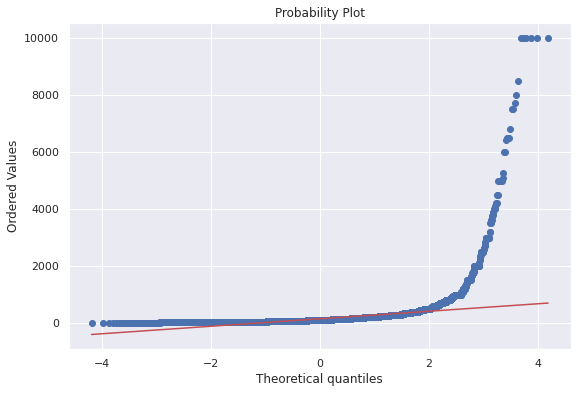

In [ ]:
plt.figure(figsize=(9, 6))
stats.probplot(df.price,plot=pylab);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


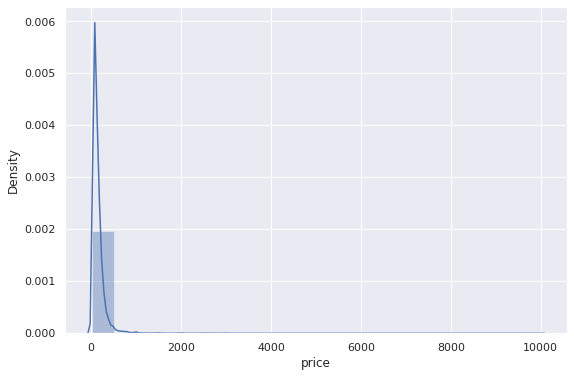

In [ ]:
plt.figure(figsize=(9, 6))
sns.distplot(df['price'],kde_kws={"label": 'price'}, bins=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


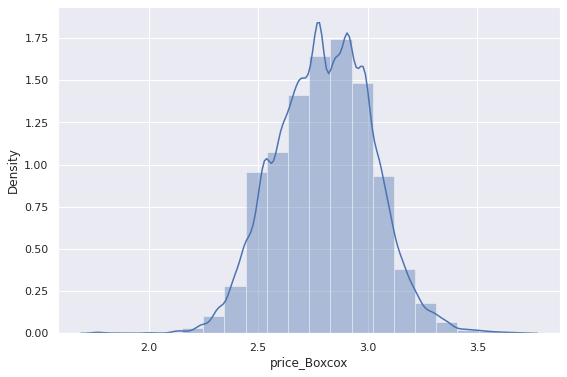

In [ ]:
plt.figure(figsize=(9, 6))
df['price_Boxcox'],parameters=stats.boxcox(df['price'])
sns.distplot(df['price_Boxcox'],kde_kws={"label": 'price_Boxcox'}, bins=20)

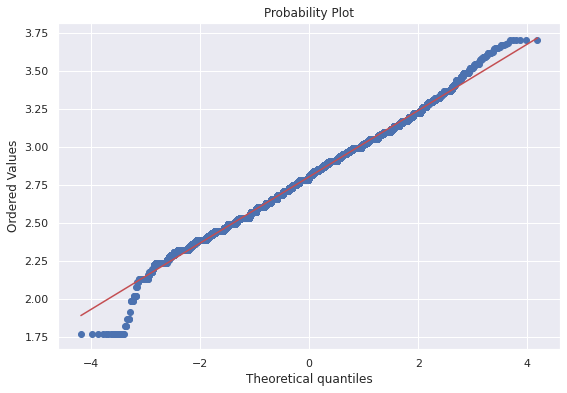

In [ ]:
plt.figure(figsize=(9, 6))
stats.probplot(df.price_Boxcox,plot=pylab);

In [ ]:
print(df.price_Boxcox.mean())
print(df.price_Boxcox.median())
print(df.price_Boxcox.mode()[0])

2.802758525845997
2.800588630131101
2.781519932051961


In [ ]:
df[["neighbourhood_group",'price_Boxcox']].groupby("neighbourhood_group").describe()

price_Boxcox            ...                    
                           count      mean  ...       75%       max
neighbourhood_group                         ...                    
Bronx                     1090.0  2.642381  ...  2.778204  3.519419
Brooklyn                 20095.0  2.752636  ...  2.908822  3.698189
Manhattan                21660.0  2.889433  ...  3.018163  3.698189
Queens                    5666.0  2.687861  ...  2.812572  3.698189
Staten Island              373.0  2.683908  ...  2.812572  3.616254

[5 rows x 8 columns]

In [ ]:
f_oneway(*[df.price_Boxcox[df.neighbourhood_group == s]
for s in df.neighbourhood_group.unique()])

F_onewayResult(statistic=1960.4664005110608, pvalue=0.0)

In [ ]:
mask = df.neighbourhood_group == "Staten Island"
val1 = df[mask]["price_Boxcox"].sample(n=100).values
len(val1)

100

In [ ]:
val2 = df["price_Boxcox"].sample(n=100).values

In [ ]:
stats.ttest_rel(val1,val2)

Ttest_relResult(statistic=-3.7460525750865443, pvalue=0.00030199530626495735)

In [ ]:
mask1 = df.neighbourhood_group == "Manhattan"
data1 = df[mask1]
manhattan = data1.sample(n=50)

mask2 = df.neighbourhood_group == "Brooklyn"
data2 = df[mask2]
brooklyn = data2.sample(n=50)

mask3 = df.neighbourhood_group == "Staten Island"
data3 = df[mask3]
staten = data3.sample(n=50)

mask4 = df.neighbourhood_group == "Queens"
data4 = df[mask4]
queens = data4.sample(n=50)

mask5 = df.neighbourhood_group == "Bronx"
data5 = df[mask5]
bronx = data5.sample(n=50)

new_samp = pd.concat([manhattan, brooklyn, staten, queens, bronx])

f_oneway(*[new_samp.price_Boxcox[new_samp.neighbourhood_group == s]
for s in new_samp.neighbourhood_group.unique()])

F_onewayResult(statistic=8.124976702118277, pvalue=3.623809577989996e-06)